# Stock Price Prediction Machine Learning - DSI Misk Skills 

# Ismail Sadiq

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# General Overview & Exploratory Data Analysis (EDA)

## Read The Data

In [ ]:
data = pd.read_csv("AAPL.csv")
print(data.head())


         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.562589  493729600
1  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.573936  601904800
2  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.469368  552160000
3  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.457407  477131200
4  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.500340  447610800


## How many rows and columns do we have?

In [ ]:
df = pd.read_csv('AAPL.csv')
df.shape
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562589,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573936,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469368,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500340,447610800
...,...,...,...,...,...,...,...
2975,2021-10-27,149.360001,149.729996,148.490005,148.850006,148.850006,56094900
2976,2021-10-28,149.820007,153.169998,149.720001,152.570007,152.570007,100077900
2977,2021-10-29,147.220001,149.940002,146.410004,149.800003,149.800003,124850400
2978,2021-11-01,148.990005,149.699997,147.800003,148.960007,148.960007,74445600


## Is there any duplicated values?

In [ ]:
df.duplicated().sum().any()

False

In [ ]:
sum(df.duplicated())

0

## What is the columns type? and is  there  a missing values?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2980 non-null   object 
 1   Open       2980 non-null   float64
 2   High       2980 non-null   float64
 3   Low        2980 non-null   float64
 4   Close      2980 non-null   float64
 5   Adj Close  2980 non-null   float64
 6   Volume     2980 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 163.1+ KB


In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary


resumetable(df)

Dataset Shape: (2980, 7)


,Name,dtypes,Missing,Uniques
0,Date,object,0,2980
1,Open,float64,0,2856
2,High,float64,0,2837
3,Low,float64,0,2853
4,Close,float64,0,2862
5,Adj Close,float64,0,2939
6,Volume,int64,0,2973


## General Statistic Description for the Data

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2.980000e+03
mean,41.024595,41.444840,40.602074,41.040715,39.343258,2.726309e+08
std,35.489778,35.893334,35.079680,35.506802,36.036754,2.265477e+08
min,6.870357,7.000000,6.794643,6.858929,5.889190,4.544800e+07
25%,18.336607,18.557768,18.146339,18.391518,16.060280,1.106592e+08
50%,28.048750,28.316250,27.805000,28.084999,25.920846,1.869154e+08
75%,47.373126,47.687499,46.905000,47.306875,45.945326,3.734612e+08
max,156.979996,157.259995,154.389999,156.690002,156.690002,1.880998e+09


## Number of Null values per column

In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## What is the relationship ?  

### First let see the general correlation between all columns

In [ ]:
print(df.corr())

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999897  0.999853  0.999753   0.999648 -0.483814
High       0.999897  1.000000  0.999818  0.999871   0.999774 -0.482251
Low        0.999853  0.999818  1.000000  0.999874   0.999770 -0.486630
Close      0.999753  0.999871  0.999874  1.000000   0.999898 -0.484570
Adj Close  0.999648  0.999774  0.999770  0.999898   1.000000 -0.483597
Volume    -0.483814 -0.482251 -0.486630 -0.484570  -0.483597  1.000000


### This heatmap shows if there is any relationship between the variables (columns)

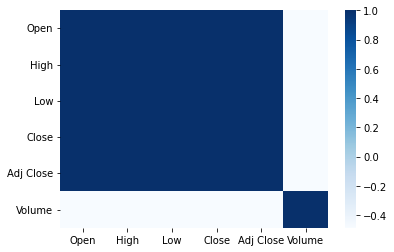

In [ ]:
sns.heatmap(df.corr(), cmap=("Blues"))

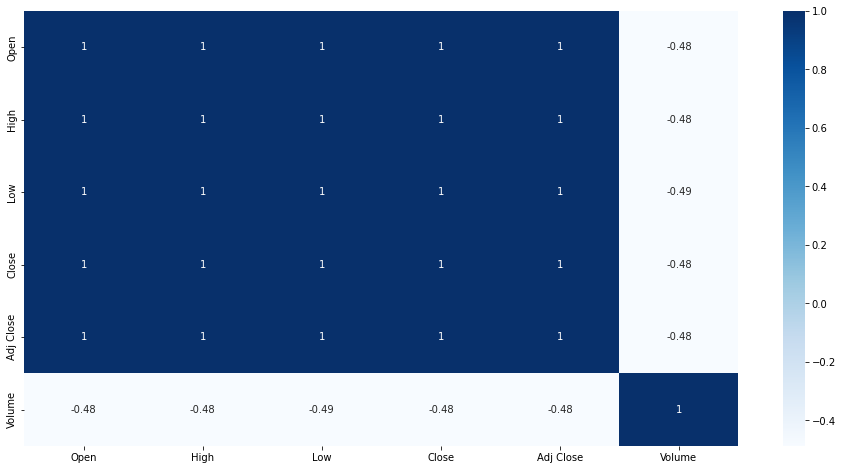

In [ ]:
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()                           

##From my observation, I find that the data have a strong relationship between the variables columns without Volume. In this project I will focus on the date and close price column to predict the future price.

## The Correlation between Close and Volume

Text(0.5, 1.0, 'Correlation between Close and Volume')

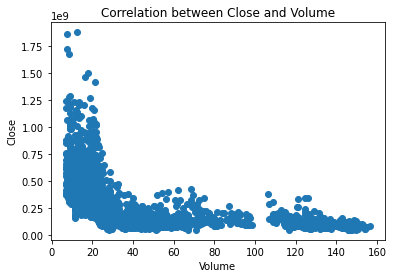

In [ ]:
plt.scatter(df['Close'], df['Volume'])
plt.ylabel("Close")
plt.xlabel("Volume")
plt.title("Correlation between Close and Volume")

## The Correlation between High and Low

Text(0.5, 1.0, 'Correlation between High and Low')

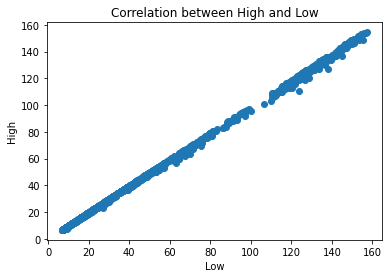

In [ ]:
plt.scatter(df['High'], df['Low'])
plt.ylabel("High")
plt.xlabel("Low")
plt.title("Correlation between High and Low")

## General overview of the relationships in the dataset

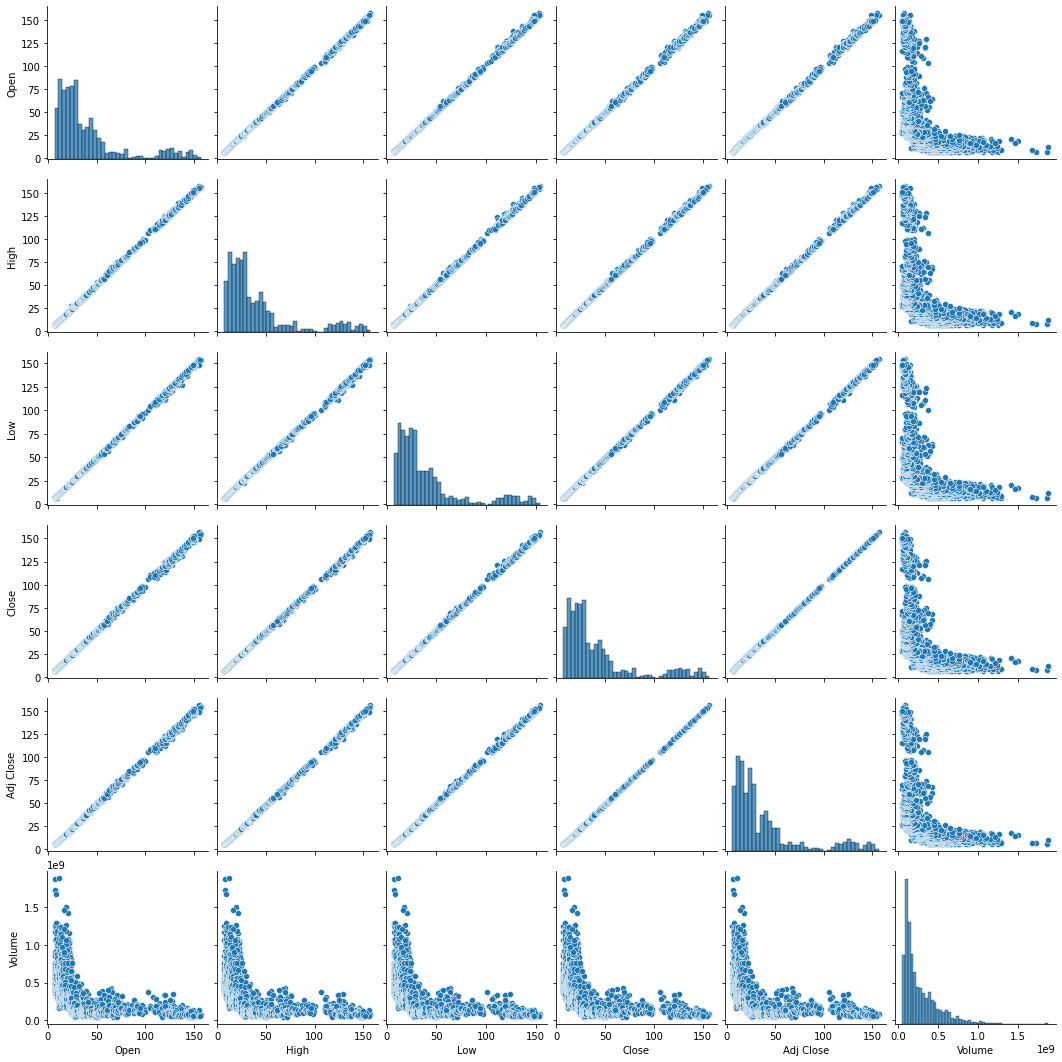

In [ ]:
sns.pairplot(df)

## What is the histogram for the columns? do they have the same distribution? 

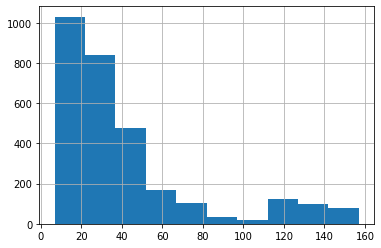

In [ ]:
df['Open'].hist()

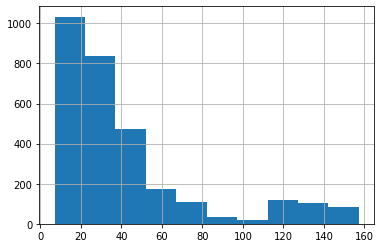

In [ ]:
df['High'].hist()

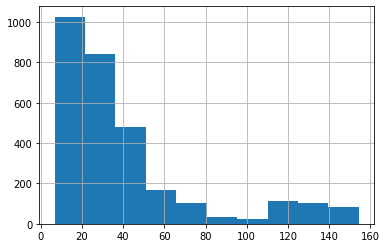

In [ ]:
df['Low'].hist()

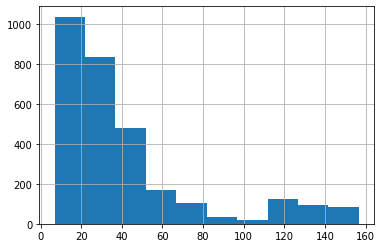

In [ ]:
df['Close'].hist()

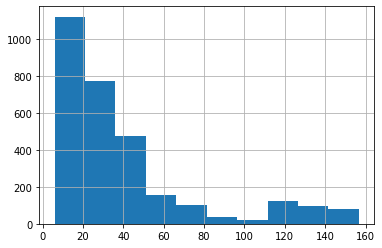

In [ ]:
df['Adj Close'].hist()

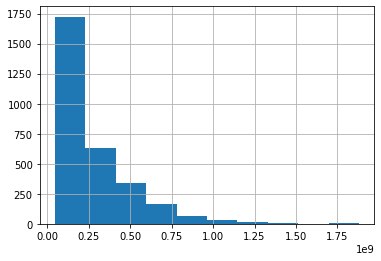

In [ ]:
df['Volume'].hist()

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562589,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573936,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469368,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500340,447610800
...,...,...,...,...,...,...,...
2975,2021-10-27,149.360001,149.729996,148.490005,148.850006,148.850006,56094900
2976,2021-10-28,149.820007,153.169998,149.720001,152.570007,152.570007,100077900
2977,2021-10-29,147.220001,149.940002,146.410004,149.800003,149.800003,124850400
2978,2021-11-01,148.990005,149.699997,147.800003,148.960007,148.960007,74445600


#  Line graph overview of the data  

In [ ]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], high=data["High"],
                                        low=data["Low"], close=data["Close"])])
figure.update_layout(title = "Apple Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

# Using Linear Regression To Predict AAPL (Apple stock) Prices

In [ ]:
data = pd.read_csv("AAPL.csv")
print(data.head())


         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.562589  493729600
1  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.573936  601904800
2  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.469368  552160000
3  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.457407  477131200
4  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.500340  447610800


In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_csv('AAPL.csv')

In [ ]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response




In [ ]:
forecast_col = 'Close'
forecast_out = 120
test_size = 0.2

In [ ]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train,Y_train) #training the linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
score=learner.score(X_test,Y_test)#testing the linear regression model
forecast= learner.predict(X_lately) #set that will contain the forecasted data
response={}#creting json object
response['test_score']=score
response['forecast_set']=forecast

print(response)

{'test_score': 0.9361812473300032, 'forecast_set': array([147.85118136, 146.47737878, 144.8241599 , 144.63788624,
       147.688189  , 145.49942112, 147.44369871, 147.21085547,
       147.15263884, 145.32478404, 144.54474592, 144.16054456,
       145.06865019, 143.29900968, 146.03497011, 146.046616  ,
       147.0245725 , 147.47862473, 146.29110513, 147.73475858,
       151.3788258 , 150.40086813, 150.99462444, 152.90397601,
       151.35555381, 153.49774979, 155.45366395, 155.12767806,
       154.79005676, 154.44078143, 156.38505902, 158.18963369,
       158.92311038, 159.28402113, 162.4158288 , 164.81415862,
       167.78297276, 166.23453194, 168.41165509, 167.70146785,
       169.02869968, 173.11517441, 172.33513629, 169.90187929,
       165.31477344, 169.62245599, 168.74927639, 170.37922213,
       172.42827778, 172.9289089 , 170.34429611, 168.26029814,
       169.02869968, 169.2848347 , 168.88899677, 171.03119391,
       170.55385106, 170.68191857, 169.61081942, 169.55260395,
    

### The Accuracy= 94%. As it can be seen, A score close to 100% indicates that the model explains the AAPL prices well

# Apple Stock Price Prediction with AutoTS Package

In [ ]:
pip install AutoTS

In [ ]:
from autots import AutoTS
model = AutoTS(forecast_length=120, frequency='infer', ensemble='simple')
model = model.fit(df, date_col='Date', value_col='Close', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print(forecast)

Inferred frequency is: B
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 6 with model DatepartRegression in generation 0 of 10


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 7 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 10
Model Number: 9 with model ETS in generation 0 of 10
Model Number: 10 with model GLM in generation 0 of 10
Model Number: 11 with model GLM in generation 0 of 10
Model Number: 12 with model GLS in generation 0 of 10
Model Number: 13 with model GLS in generation 0 of 10
Model Number: 14 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 14: GluonTS
Model Number: 15 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 15: GluonTS
Model Number: 16 with model GluonTS in generation 0 of 10
Template Eval Error: ImportErr

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 42 with model AverageValueNaive in generation 0 of 10


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:847: RuntimeWarning:

invalid value encountered in true_divide

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:689: RuntimeWarning:

Degrees of freedom <= 0 for slice.



Template Eval Error: ValueError('Shape of passed values is (2967, 2968), indices imply (2967, 1)') in model 42: AverageValueNaive
Model Number: 43 with model GLS in generation 0 of 10
Model Number: 44 with model SeasonalNaive in generation 0 of 10
Model Number: 45 with model GLM in generation 0 of 10
Model Number: 46 with model ETS in generation 0 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 47 with model FBProphet in generation 0 of 10
Model Number: 48 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 48: GluonTS
Model Number: 49 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 49: UnobservedComponents
Model Number: 50 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 50: VAR
Model Number: 51 with model VECM in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 51: VECM
Model Number: 52 with model WindowRegression in generation 0 of 10
Model Number: 53 with model DatepartRegression in generation 0 of 10
Model Number: 54 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regressi

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/polyint.py:544: RuntimeWarning:

overflow encountered in multiply

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/polyint.py:545: RuntimeWarning:

overflow encountered in reduce

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/polyint.py:642: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 60 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/api.py)") in model 60: ARDL
Model Number: 61 with model DatepartRegression in generation 0 of 10
Model Number: 62 with model ETS in generation 0 of 10
Model Number: 63 with model AverageValueNaive in generation 0 of 10
Model Number: 64 with model LastValueNaive in generation 0 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 65 with model FBProphet in generation 0 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 66 with model FBProphet in generation 0 of 10
Model Number: 67 with model ZeroesNaive in generation 0 of 10
Model Number: 68 with model ETS in generation 0 of 10
Model Number: 69 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 69: VECM
Model Number: 70 with model Theta in generation 0 of 10
Model Number: 71 with model GLS in generation 0 of 10
Model Number: 72 with model ETS in generation 0 of 10
Model Number: 73 with model SeasonalNaive in generation 0 of 10
Model Number: 74 with model ZeroesNaive in generation 0 of 10
Model Number: 75 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/api.py)") in model 75: ARDL
Model Number: 76 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Model Number: 79 with model UnivariateRegression in generation 0 of 10
Template Eval Error: TypeError("unsupported operand type(s) for -: 'NoneType' and 'int'") in model 79: UnivariateRegression
Model Number: 80 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 80: WindowRegression
Model Number: 81 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 81: DatepartRegression
Model Number: 82 with model GLM in generation 0 of 10
Model Number: 83 with model AverageValueNaive in generation 0 of 10
Model Number: 84 with model WindowRegression in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 84: WindowRegression
Model Number: 85 with model GLM in generation 0 of 10
Model Number: 86 with model SeasonalNaive in generation 0 of 10
Model Number: 87 with

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 88 with model FBProphet in generation 0 of 10
Model Number: 89 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 89: GluonTS
Model Number: 90 with model SeasonalNaive in generation 0 of 10
Model Number: 91 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 91: GluonTS
Model Number: 92 with model ARDL in generation 0 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/api.py)") in model 92: ARDL
Model Number: 93 with model SeasonalNaive in generation 0 of 10
Model Number: 94 with model MultivariateMotif in generation 0 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 95 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 95: DatepartRegression
Model Number: 96 with model FBProphet in generation 0 of 10
Model Number: 97 with model SectionalMotif in generation 0 of 10
Model Number: 98 with model MultivariateMotif in generation 0 of 10
Model Number: 99 with model SeasonalNaive in generation 0 of 10
Model Number: 100 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 100: VAR
Model Number: 101 with model LastValueNaive in generation 0 of 10
Template Eval Error: ValueError('shapes (120,2968) and (1,1) not aligned: 2968 (dim 1) != 1 (dim 0)') in model 101: LastValueNaive
Model Number: 102 with model ZeroesNaive in generation 0 of 10
Model Number: 103 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 125 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 125: UnobservedComponents
Model Number: 126 with model ZeroesNaive in generation 0 of 10
Model Number: 127 with model ETS in generation 0 of 10
Model Number: 128 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 128: ARDL
Model Number: 129 with model LastValueNaive in generation 0 of 10
Model Number: 130 with model GLM in generation 0 of 10


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Model Number: 131 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 131: GluonTS
Model Number: 132 with model SectionalMotif in generation 0 of 10
Model Number: 133 with model UnobservedComponents in generation 0 of 10
Template Eval Error: TypeError('issubclass() arg 2 must be a class or tuple of classes') in model 133: UnobservedComponents
Model Number: 134 with model ETS in generation 0 of 10
Model Number: 135 with model WindowRegression in generation 0 of 10
Template Eval Error: KeyError('squared_error') in model 135: WindowRegression
Model Number: 136 with model GLM in generation 0 of 10
Model Number: 137 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 137: GluonTS
Model Number: 138 with model GluonTS in generation 0 of 10
Template Eval Error: Import

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:412: RuntimeWarning:

invalid value encountered in true_divide

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 144 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 144: VAR
New Generation: 1 of 10
Model Number: 145 with model FBProphet in generation 1 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 146 with model FBProphet in generation 1 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 147 with model FBProphet in generation 1 of 10
Model Number: 148 with model FBProphet in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 148: FBProphet
Model Number: 149 with model WindowRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 149: WindowRegression
Model Number: 150 with model WindowRegression in generation 1 of 10


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1951: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 25467.802400387824, tolerance: 6969.334327311824



Model Number: 151 with model WindowRegression in generation 1 of 10
Model Number: 152 with model NVAR in generation 1 of 10


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 153 with model NVAR in generation 1 of 10
Model Number: 154 with model NVAR in generation 1 of 10
Model Number: 155 with model NVAR in generation 1 of 10
Model Number: 156 with model LastValueNaive in generation 1 of 10
Model Number: 157 with model LastValueNaive in generation 1 of 10
Model Number: 158 with model LastValueNaive in generation 1 of 10
Model Number: 159 with model AverageValueNaive in generation 1 of 10
Model Number: 160 with model AverageValueNaive in generation 1 of 10
Model Number: 161 with model AverageValueNaive in generation 1 of 10
Model Number: 162 with model ZeroesNaive in generation 1 of 10
Model Number: 163 with model ZeroesNaive in generation 1 of 10
Model Number: 164 with model ZeroesNaive in generation 1 of 10
Model Number: 165 with model SeasonalNaive in generation 1 of 10
Model Number: 166 with model SeasonalNaive in generation 1 of 10
Model Number: 167 with model SeasonalNaive in generation 1 of 10
Model Number: 168 with model SeasonalNaive 

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/polyint.py:544: RuntimeWarning:

overflow encountered in multiply

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/polyint.py:545: RuntimeWarning:

overflow encountered in reduce

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/polyint.py:642: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 184 with model Theta in generation 1 of 10
Model Number: 185 with model Theta in generation 1 of 10
Model Number: 186 with model Theta in generation 1 of 10
Model Number: 187 with model UnivariateMotif in generation 1 of 10
Model Number: 188 with model UnivariateMotif in generation 1 of 10
Model Number: 189 with model UnivariateMotif in generation 1 of 10
Model Number: 190 with model UnivariateMotif in generation 1 of 10
Model Number: 191 with model GLM in generation 1 of 10
Model Number: 192 with model GLM in generation 1 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 192: GLM
Model Number: 193 with model GLM in generation 1 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 193: GLM
Model Number: 194 with model GLM in generation 1 of 10


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning:

invalid value encountered in log

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning:

overflow encountered in exp

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

invalid value encountered in multiply

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:1198: RuntimeWarning:

invalid value encountered in multiply



Model Number: 195 with model MultivariateMotif in generation 1 of 10
Model Number: 196 with model MultivariateMotif in generation 1 of 10
Model Number: 197 with model MultivariateMotif in generation 1 of 10
Model Number: 198 with model MultivariateMotif in generation 1 of 10
Model Number: 199 with model UnobservedComponents in generation 1 of 10
Model Number: 200 with model UnobservedComponents in generation 1 of 10
Template Eval Error: TypeError('issubclass() arg 2 must be a class or tuple of classes') in model 200: UnobservedComponents
Model Number: 201 with model UnobservedComponents in generation 1 of 10
Model Number: 202 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 202: GluonTS
Model Number: 203 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 2

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 222 with model FBProphet in generation 2 of 10
Model Number: 223 with model FBProphet in generation 2 of 10


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:400: RuntimeWarning:

All-NaN slice encountered

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:401: RuntimeWarning:

All-NaN slice encountered

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: ValueError('Shape of passed values is (2967, 2968), indices imply (2967, 1)') in model 223: FBProphet
Model Number: 224 with model FBProphet in generation 2 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 225 with model FBProphet in generation 2 of 10
Model Number: 226 with model NVAR in generation 2 of 10
Model Number: 227 with model NVAR in generation 2 of 10
Model Number: 228 with model NVAR in generation 2 of 10
Model Number: 229 with model NVAR in generation 2 of 10
Model Number: 230 with model WindowRegression in generation 2 of 10
Model Number: 231 with model WindowRegression in generation 2 of 10
Model Number: 232 with model WindowRegression in generation 2 of 10
Model Number: 233 with model LastValueNaive in generation 2 of 10
Model Number: 234 with model LastValueNaive in generation 2 of 10
Model Number: 235 with model GLS in generation 2 of 10
Model Number: 236 with model GLS in generation 2 of 10
Model Number: 237 with model GLS in generation 2 of 10
Model Number: 238 with model AverageValueNaive in generation 2 of 10
Model Number: 239 with model AverageValueNaive in generation 2 of 10
Model Number: 240 with model AverageValueNaive in generation 2 of 10
Model N

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/polyint.py:544: RuntimeWarning:

overflow encountered in multiply

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/polyint.py:545: RuntimeWarning:

overflow encountered in reduce

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/polyint.py:642: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 255 with model SectionalMotif in generation 2 of 10
Model Number: 256 with model SectionalMotif in generation 2 of 10
Model Number: 257 with model SectionalMotif in generation 2 of 10
Model Number: 258 with model SectionalMotif in generation 2 of 10
Model Number: 259 with model MultivariateMotif in generation 2 of 10
Model Number: 260 with model MultivariateMotif in generation 2 of 10
Model Number: 261 with model MultivariateMotif in generation 2 of 10
Model Number: 262 with model MultivariateMotif in generation 2 of 10
Model Number: 263 with model UnivariateMotif in generation 2 of 10
Model Number: 264 with model UnivariateMotif in generation 2 of 10
Model Number: 265 with model UnivariateMotif in generation 2 of 10
Model Number: 266 with model UnivariateMotif in generation 2 of 10
Model Number: 267 with model DatepartRegression in generation 2 of 10
Template Eval Error: KeyError('squared_error') in model 267: DatepartRegression
Model Number: 268 with model DatepartRegre

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 270 with model ETS in generation 2 of 10
Model Number: 271 with model ETS in generation 2 of 10
Model Number: 272 with model ETS in generation 2 of 10
Model Number: 273 with model ETS in generation 2 of 10
Model Number: 274 with model GLM in generation 2 of 10


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Model Number: 275 with model GLM in generation 2 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 275: GLM
Model Number: 276 with model GLM in generation 2 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 276: GLM
Model Number: 277 with model GLM in generation 2 of 10


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning:

invalid value encountered in log

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Model Number: 278 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 278: GluonTS
Model Number: 279 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 279: GluonTS
Model Number: 280 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 280: GluonTS
Model Number: 281 with model GluonTS in generation 2 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 281: GluonTS
Model Number: 282 with model VAR in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 282: VAR
Model Number: 283 with model VAR in generation 2 of 10
Template Eval E

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/api.py)") in model 297: ARDL
New Generation: 3 of 10
Model Number: 298 with model FBProphet in generation 3 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 299 with model FBProphet in generation 3 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 300 with model FBProphet in generation 3 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 301 with model FBProphet in generation 3 of 10
Model Number: 302 with model NVAR in generation 3 of 10
Model Number: 303 with model NVAR in generation 3 of 10
Model Number: 304 with model NVAR in generation 3 of 10
Model Number: 305 with model NVAR in generation 3 of 10
Model Number: 306 with model WindowRegression in generation 3 of 10


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 307 with model WindowRegression in generation 3 of 10
Model Number: 308 with model WindowRegression in generation 3 of 10


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to co

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to co

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to co

Model Number: 309 with model LastValueNaive in generation 3 of 10


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 310 with model LastValueNaive in generation 3 of 10
Model Number: 311 with model LastValueNaive in generation 3 of 10
Model Number: 312 with model GLS in generation 3 of 10
Model Number: 313 with model GLS in generation 3 of 10
Model Number: 314 with model GLS in generation 3 of 10
Model Number: 315 with model AverageValueNaive in generation 3 of 10
Model Number: 316 with model AverageValueNaive in generation 3 of 10
Model Number: 317 with model AverageValueNaive in generation 3 of 10
Model Number: 318 with model SeasonalNaive in generation 3 of 10
Model Number: 319 with model SeasonalNaive in generation 3 of 10
Model Number: 320 with model SeasonalNaive in generation 3 of 10
Model Number: 321 with model SeasonalNaive in generation 3 of 10
Model Number: 322 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 322: UnobservedComponents
Model Number: 323 with model Unobserve

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 345 with model DatepartRegression in generation 3 of 10
[LibLinear]

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 346 with model DatepartRegression in generation 3 of 10
Model Number: 347 with model ETS in generation 3 of 10
Model Number: 348 with model ETS in generation 3 of 10
Model Number: 349 with model ETS in generation 3 of 10
Model Number: 350 with model ETS in generation 3 of 10
Model Number: 351 with model GLM in generation 3 of 10
Model Number: 352 with model GLM in generation 3 of 10


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning:

invalid value encountered in log



Model Number: 353 with model GLM in generation 3 of 10
Model Number: 354 with model GLM in generation 3 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 354: GLM
Model Number: 355 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 355: GluonTS
Model Number: 356 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 356: GluonTS
Model Number: 357 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 357: GluonTS
Model Number: 358 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:517: RuntimeWarning:

overflow encountered in exp

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning:

divide by zero encountered in true_divide

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning:

divide by zero encountered in log

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

invalid value encountered in multiply

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:1198: RuntimeWarning:

invalid value encountered in multiply



Template Eval Error: ValueError('Only gave one variable to VECM') in model 363: VECM
Model Number: 364 with model VECM in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 364: VECM
Model Number: 365 with model VECM in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 365: VECM
Model Number: 366 with model VECM in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 366: VECM
Model Number: 367 with model UnivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 367: UnivariateRegression
Model Number: 368 with model UnivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 368: UnivariateRegression
Model Number: 369 with model UnivariateRegression in generation 3 of 10
Template Eval Error:

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 375 with model FBProphet in generation 4 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 376 with model FBProphet in generation 4 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 377 with model FBProphet in generation 4 of 10
Model Number: 378 with model WindowRegression in generation 4 of 10
Model Number: 379 with model WindowRegression in generation 4 of 10
Model Number: 380 with model WindowRegression in generation 4 of 10
Model Number: 381 with model NVAR in generation 4 of 10
Model Number: 382 with model NVAR in generation 4 of 10
Model Number: 383 with model NVAR in generation 4 of 10
Model Number: 384 with model NVAR in generation 4 of 10
Model Number: 385 with model GLS in generation 4 of 10
Model Number: 386 with model GLS in generation 4 of 10
Model Number: 387 with model GLS in generation 4 of 10
Model Number: 388 with model SeasonalNaive in generation 4 of 10
Model Number: 389 with model SeasonalNaive in generation 4 of 10
Model Number: 390 with model SeasonalNaive in generation 4 of 10
Model Number: 391 with model SeasonalNaive in generation 4 of 10
Model Number: 392 with model LastValueNaive in generation 4 of 10
Model Number: 393 wi

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Model Number: 416 with model GLM in generation 4 of 10
Model Number: 417 with model GLM in generation 4 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 417: GLM
Model Number: 418 with model GLM in generation 4 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 418: GLM
Model Number: 419 with model ETS in generation 4 of 10
Model Number: 420 with model ETS in generation 4 of 10
Model Number: 421 with model ETS in generation 4 of 10
Model Number: 422 with model ETS in generation 4 of 10
Model Number: 423 with model UnivariateMotif in generation 4 of 10
Model Number: 424 with model UnivariateMotif in generation 4 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 424: UnivariateMotif
Model Number: 425 with model UnivariateMotif in generation 4 of 10
Model Number: 426 with model UnivariateMotif in generation 4 of 10
Model Number: 427 w

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_regression.py:421: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series') in model 427: DatepartRegression
Model Number: 428 with model DatepartRegression in generation 4 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 428: DatepartRegression
Model Number: 429 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 429: DatepartRegression
Model Number: 430 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 430: GluonTS
Model Number: 431 with model GluonTS in generation 4 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 431: GluonTS
Model Number: 432 with model GluonTS in generation 4 of 10
Template Eval Error: I

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 450 with model FBProphet in generation 5 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 451 with model FBProphet in generation 5 of 10
Model Number: 452 with model FBProphet in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 452: FBProphet
Model Number: 453 with model NVAR in generation 5 of 10
Model Number: 454 with model NVAR in generation 5 of 10
Model Number: 455 with model NVAR in generation 5 of 10
Model Number: 456 with model NVAR in generation 5 of 10
Model Number: 457 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 457: WindowRegression
Model Number: 458 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 458: WindowRegression
Model Number: 459 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type=

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Model Number: 471 with model GLM in generation 5 of 10
Model Number: 472 with model GLM in generation 5 of 10


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Model Number: 473 with model SeasonalNaive in generation 5 of 10
Model Number: 474 with model SeasonalNaive in generation 5 of 10
Model Number: 475 with model SeasonalNaive in generation 5 of 10
Model Number: 476 with model SeasonalNaive in generation 5 of 10
Model Number: 477 with model AverageValueNaive in generation 5 of 10
Model Number: 478 with model AverageValueNaive in generation 5 of 10
Model Number: 479 with model AverageValueNaive in generation 5 of 10
Model Number: 480 with model Theta in generation 5 of 10
Model Number: 481 with model Theta in generation 5 of 10
Model Number: 482 with model Theta in generation 5 of 10
Model Number: 483 with model Theta in generation 5 of 10
Model Number: 484 with model UnobservedComponents in generation 5 of 10
Model Number: 485 with model UnobservedComponents in generation 5 of 10
Model Number: 486 with model UnobservedComponents in generation 5 of 10
Model Number: 487 with model MultivariateMotif in generation 5 of 10
Model Number: 488 wi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 501 with model DatepartRegression in generation 5 of 10


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_regression.py:421: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series') in model 501: DatepartRegression
Model Number: 502 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 502: GluonTS
Model Number: 503 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 503: GluonTS
Model Number: 504 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 504: GluonTS
Model Number: 505 with model GluonTS in generation 5 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 505: GluonTS
Model Number: 506 with model VAR in generation 5 of 10
Template Eval Error: Val

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 522 with model FBProphet in generation 6 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 523 with model FBProphet in generation 6 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 524 with model FBProphet in generation 6 of 10
Model Number: 525 with model NVAR in generation 6 of 10
Model Number: 526 with model NVAR in generation 6 of 10
Model Number: 527 with model NVAR in generation 6 of 10
Model Number: 528 with model NVAR in generation 6 of 10
Model Number: 529 with model WindowRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 529: WindowRegression
Model Number: 530 with model WindowRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 530: WindowRegression
Model Number: 531 with model WindowRegression in generation 6 of 10
Model Number: 532 with model Theta in generation 6 of 10
Model Number: 533 with model Theta in generation 6 of 10
Model Number: 534 with model Theta in generation 6 of 10
Model Number: 535 with model Theta in generation 6 of 10
Model Number: 536 with model GLS in generat

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Model Number: 552 with model GLM in generation 6 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 552: GLM
Model Number: 553 with model GLM in generation 6 of 10


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning:

invalid value encountered in log

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Model Number: 554 with model AverageValueNaive in generation 6 of 10
Model Number: 555 with model AverageValueNaive in generation 6 of 10
Model Number: 556 with model AverageValueNaive in generation 6 of 10
Model Number: 557 with model ETS in generation 6 of 10
Model Number: 558 with model ETS in generation 6 of 10
Model Number: 559 with model ETS in generation 6 of 10
Model Number: 560 with model UnobservedComponents in generation 6 of 10
Model Number: 561 with model UnobservedComponents in generation 6 of 10
Model Number: 562 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 562: UnobservedComponents
Model Number: 563 with model ZeroesNaive in generation 6 of 10
Model Number: 564 with model ZeroesNaive in generation 6 of 10
Model Number: 565 with model ZeroesNaive in generation 6 of 10
Model Number: 566 with model MultivariateMotif in generation 6 of 10
Model Number: 567 with model

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Template Eval Error: ValueError('Only gave one variable to VECM') in model 585: VECM
Model Number: 586 with model VECM in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 586: VECM
Model Number: 587 with model VECM in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 587: VECM
Model Number: 588 with model VECM in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 588: VECM
Model Number: 589 with model UnivariateRegression in generation 6 of 10
Template Eval Error: TypeError("unsupported operand type(s) for -: 'NoneType' and 'int'") in model 589: UnivariateRegression
Model Number: 590 with model UnivariateRegression in generation 6 of 10
Template Eval Error: TypeError("unsupported operand type(s) for -: 'NoneType' and 'int'") in model 590: UnivariateRegression
Model Number: 591 with model UnivariateRegression in generation 6 of 10
Template Eval Error: Value

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


New Generation: 7 of 10
Model Number: 597 with model FBProphet in generation 7 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 598 with model FBProphet in generation 7 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 599 with model FBProphet in generation 7 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 600 with model FBProphet in generation 7 of 10
Model Number: 601 with model WindowRegression in generation 7 of 10
Model Number: 602 with model WindowRegression in generation 7 of 10
Model Number: 603 with model WindowRegression in generation 7 of 10
Model Number: 604 with model NVAR in generation 7 of 10
Model Number: 605 with model NVAR in generation 7 of 10
Model Number: 606 with model NVAR in generation 7 of 10
Model Number: 607 with model NVAR in generation 7 of 10
Model Number: 608 with model Theta in generation 7 of 10
Model Number: 609 with model Theta in generation 7 of 10
Model Number: 610 with model Theta in generation 7 of 10
Model Number: 611 with model Theta in generation 7 of 10
Model Number: 612 with model GLS in generation 7 of 10
Model Number: 613 with model GLS in generation 7 of 10
Model Number: 614 with model GLS in generation 7 of 10
Model Number: 615 with model SectionalMotif in generation 7 of 10
Model Number: 616 with model SectionalMotif in gener

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Model Number: 627 with model GLM in generation 7 of 10
Model Number: 628 with model AverageValueNaive in generation 7 of 10
Model Number: 629 with model AverageValueNaive in generation 7 of 10
Model Number: 630 with model AverageValueNaive in generation 7 of 10
Model Number: 631 with model ETS in generation 7 of 10
Model Number: 632 with model ETS in generation 7 of 10
Model Number: 633 with model ETS in generation 7 of 10
Model Number: 634 with model ETS in generation 7 of 10
Model Number: 635 with model UnobservedComponents in generation 7 of 10
Model Number: 636 with model UnobservedComponents in generation 7 of 10
Model Number: 637 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 637: UnobservedComponents
Model Number: 638 with model MultivariateMotif in generation 7 of 10
Model Number: 639 with model MultivariateMotif in generation 7 of 10
Model Number: 640 with model Multivari

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



Model Number: 651 with model DatepartRegression in generation 7 of 10
Model Number: 652 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 652: GluonTS
Model Number: 653 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 653: GluonTS
Model Number: 654 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 654: GluonTS
Model Number: 655 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 655: GluonTS
Model Number: 656 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 656: VAR


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 241.61436200147728, tolerance: 0.6360406872209354

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1967.0340885177816, tolerance: 0.6255376879951667

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/api.py)") in model 671: ARDL
New Generation: 8 of 10
Model Number: 672 with model FBProphet in generation 8 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 673 with model FBProphet in generation 8 of 10
Model Number: 674 with model WindowRegression in generation 8 of 10


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 675 with model WindowRegression in generation 8 of 10
Model Number: 676 with model WindowRegression in generation 8 of 10
Template Eval Error: KeyError('squared_error') in model 676: WindowRegression
Model Number: 677 with model NVAR in generation 8 of 10
Model Number: 678 with model NVAR in generation 8 of 10
Model Number: 679 with model NVAR in generation 8 of 10
Model Number: 680 with model NVAR in generation 8 of 10
Model Number: 681 with model SectionalMotif in generation 8 of 10
Model Number: 682 with model SectionalMotif in generation 8 of 10
Model Number: 683 with model SectionalMotif in generation 8 of 10
Model Number: 684 with model SectionalMotif in generation 8 of 10
Model Number: 685 with model Theta in generation 8 of 10
Model Number: 686 with model Theta in generation 8 of 10
Model Number: 687 with model Theta in generation 8 of 10
Model Number: 688 with model Theta in generation 8 of 10
Model Number: 689 with model ETS in generation 8 of 10
Model Number: 6

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1444: RuntimeWarning:

invalid value encountered in log



Model Number: 696 with model GLM in generation 8 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 696: GLM
Model Number: 697 with model GLS in generation 8 of 10
Model Number: 698 with model SeasonalNaive in generation 8 of 10
Model Number: 699 with model SeasonalNaive in generation 8 of 10
Model Number: 700 with model SeasonalNaive in generation 8 of 10
Model Number: 701 with model SeasonalNaive in generation 8 of 10
Model Number: 702 with model LastValueNaive in generation 8 of 10
Model Number: 703 with model LastValueNaive in generation 8 of 10
Model Number: 704 with model AverageValueNaive in generation 8 of 10
Model Number: 705 with model AverageValueNaive in generation 8 of 10
Model Number: 706 with model AverageValueNaive in generation 8 of 10
Model Number: 707 with model UnobservedComponents in generation 8 of 10
Template Eval Error: TypeError('issubclass() arg 2 must be a class or tuple of classes') in model 707: UnobservedC

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 722 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 722: GluonTS
Model Number: 723 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 723: GluonTS
Model Number: 724 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 724: GluonTS
Model Number: 725 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 725: GluonTS
Model Number: 726 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 726: VAR
Model Number: 727 with model VAR in generation 8 of 10
Template Eval E

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 742 with model FBProphet in generation 9 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 743 with model FBProphet in generation 9 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 744 with model FBProphet in generation 9 of 10
Model Number: 745 with model NVAR in generation 9 of 10
Model Number: 746 with model NVAR in generation 9 of 10
Model Number: 747 with model NVAR in generation 9 of 10
Model Number: 748 with model NVAR in generation 9 of 10
Model Number: 749 with model WindowRegression in generation 9 of 10
Model Number: 750 with model WindowRegression in generation 9 of 10
Model Number: 751 with model WindowRegression in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 751: WindowRegression
Model Number: 752 with model SectionalMotif in generation 9 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 752: SectionalMotif
Model Number: 753 with model SectionalMotif in generation 9 of 10
Model Number: 754 with model SectionalMotif in generation 9 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied")

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Model Number: 771 with model GLM in generation 9 of 10
Model Number: 772 with model GLM in generation 9 of 10
Model Number: 773 with model GLM in generation 9 of 10
Model Number: 774 with model GLS in generation 9 of 10
Model Number: 775 with model GLS in generation 9 of 10
Model Number: 776 with model GLS in generation 9 of 10
Model Number: 777 with model SeasonalNaive in generation 9 of 10
Model Number: 778 with model SeasonalNaive in generation 9 of 10
Model Number: 779 with model SeasonalNaive in generation 9 of 10
Model Number: 780 with model SeasonalNaive in generation 9 of 10
Model Number: 781 with model LastValueNaive in generation 9 of 10
Model Number: 782 with model LastValueNaive in generation 9 of 10
Model Number: 783 with model LastValueNaive in generation 9 of 10
Model Number: 784 with model AverageValueNaive in generation 9 of 10
Model Number: 785 with model AverageValueNaive in generation 9 of 10
Model Number: 786 with model AverageValueNaive in generation 9 of 10
Model

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 819 with model FBProphet in generation 10 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 820 with model FBProphet in generation 10 of 10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 821 with model FBProphet in generation 10 of 10
Model Number: 822 with model NVAR in generation 10 of 10
Model Number: 823 with model NVAR in generation 10 of 10
Model Number: 824 with model NVAR in generation 10 of 10
Model Number: 825 with model NVAR in generation 10 of 10
Model Number: 826 with model WindowRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 826: WindowRegression
Model Number: 827 with model WindowRegression in generation 10 of 10
Model Number: 828 with model WindowRegression in generation 10 of 10
Model Number: 829 with model SectionalMotif in generation 10 of 10
Model Number: 830 with model SectionalMotif in generation 10 of 10
Model Number: 831 with model SectionalMotif in generation 10 of 10
Model Number: 832 with model SectionalMotif in generation 10 of 10
Model Number: 833 with model DatepartRegression in generation 10 of 10
Template Eval Error: ImportError('Tensorflow

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Model Number: 848 with model GLM in generation 10 of 10
Model Number: 849 with model GLM in generation 10 of 10
Model Number: 850 with model GLM in generation 10 of 10


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Model Number: 851 with model GLS in generation 10 of 10
Model Number: 852 with model GLS in generation 10 of 10
Model Number: 853 with model GLS in generation 10 of 10
Model Number: 854 with model SeasonalNaive in generation 10 of 10
Model Number: 855 with model SeasonalNaive in generation 10 of 10
Model Number: 856 with model SeasonalNaive in generation 10 of 10
Model Number: 857 with model SeasonalNaive in generation 10 of 10
Model Number: 858 with model LastValueNaive in generation 10 of 10
Model Number: 859 with model LastValueNaive in generation 10 of 10
Model Number: 860 with model AverageValueNaive in generation 10 of 10
Model Number: 861 with model AverageValueNaive in generation 10 of 10
Model Number: 862 with model AverageValueNaive in generation 10 of 10
Model Number: 863 with model MultivariateMotif in generation 10 of 10
Model Number: 864 with model MultivariateMotif in generation 10 of 10
Model Number: 865 with model MultivariateMotif in generation 10 of 10
Model Number: 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 871 with model Ensemble in generation 11 of 0


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 872 with model Ensemble in generation 11 of 0


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 873 with model Ensemble in generation 11 of 0


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to co

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to co

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to co

Model Number: 874 with model Ensemble in generation 11 of 0
Model Number: 875 with model Ensemble in generation 11 of 0


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Validation Round: 1
Model Number: 1 of 132 with model Ensemble for Validation 1


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to co

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to co

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to co

1 - Ensemble with avg smape 8.08: 
Model Number: 2 of 132 with model FBProphet for Validation 1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2 - FBProphet with avg smape 17.28: 
Model Number: 3 of 132 with model Ensemble for Validation 1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


3 - Ensemble with avg smape 18.64: 
Model Number: 4 of 132 with model FBProphet for Validation 1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4 - FBProphet with avg smape 19.49: 
Model Number: 5 of 132 with model Ensemble for Validation 1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


5 - Ensemble with avg smape 15.57: 
Model Number: 6 of 132 with model FBProphet for Validation 1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


6 - FBProphet with avg smape 19.17: 
Model Number: 7 of 132 with model FBProphet for Validation 1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


7 - FBProphet with avg smape 19.15: 
Model Number: 8 of 132 with model FBProphet for Validation 1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


8 - FBProphet with avg smape 19.17: 
Model Number: 9 of 132 with model FBProphet for Validation 1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


9 - FBProphet with avg smape 19.2: 
Model Number: 10 of 132 with model FBProphet for Validation 1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


10 - FBProphet with avg smape 19.13: 
Model Number: 11 of 132 with model FBProphet for Validation 1
11 - FBProphet with avg smape 19.28: 
Model Number: 12 of 132 with model NVAR for Validation 1
12 - NVAR with avg smape 8.47: 
Model Number: 13 of 132 with model WindowRegression for Validation 1


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to co

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to co

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to co

13 - WindowRegression with avg smape 9.97: 
Model Number: 14 of 132 with model NVAR for Validation 1
14 - NVAR with avg smape 7.35: 
Model Number: 15 of 132 with model SectionalMotif for Validation 1
15 - SectionalMotif with avg smape 15.1: 
Model Number: 16 of 132 with model NVAR for Validation 1
16 - NVAR with avg smape 7.06: 
Model Number: 17 of 132 with model Ensemble for Validation 1


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



17 - Ensemble with avg smape 5.7: 
Model Number: 18 of 132 with model Ensemble for Validation 1


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


18 - Ensemble with avg smape 6.07: 
Model Number: 19 of 132 with model DatepartRegression for Validation 1


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



19 - DatepartRegression with avg smape 6.46: 
Model Number: 20 of 132 with model NVAR for Validation 1
20 - NVAR with avg smape 8.41: 
Model Number: 21 of 132 with model NVAR for Validation 1
21 - NVAR with avg smape 8.4: 
Model Number: 22 of 132 with model UnobservedComponents for Validation 1
22 - UnobservedComponents with avg smape 37.75: 
Model Number: 23 of 132 with model NVAR for Validation 1
23 - NVAR with avg smape 7.77: 
Model Number: 24 of 132 with model GLM for Validation 1


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



24 - GLM with avg smape 5.85: 
Model Number: 25 of 132 with model NVAR for Validation 1
25 - NVAR with avg smape 7.47: 
Model Number: 26 of 132 with model NVAR for Validation 1
26 - NVAR with avg smape 9.23: 
Model Number: 27 of 132 with model WindowRegression for Validation 1


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



27 - WindowRegression with avg smape 42.45: 
Model Number: 28 of 132 with model GLM for Validation 1
28 - GLM with avg smape 4.34: 
Model Number: 29 of 132 with model Theta for Validation 1
29 - Theta with avg smape 4.96: 
Model Number: 30 of 132 with model Theta for Validation 1
30 - Theta with avg smape 4.96: 
Model Number: 31 of 132 with model Theta for Validation 1
31 - Theta with avg smape 4.96: 
Model Number: 32 of 132 with model Theta for Validation 1
32 - Theta with avg smape 4.96: 
Model Number: 33 of 132 with model Theta for Validation 1
33 - Theta with avg smape 4.96: 
Model Number: 34 of 132 with model Theta for Validation 1
34 - Theta with avg smape 4.96: 
Model Number: 35 of 132 with model WindowRegression for Validation 1


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



35 - WindowRegression with avg smape 4.9: 
Model Number: 36 of 132 with model UnobservedComponents for Validation 1
Template Eval Error: TypeError('issubclass() arg 2 must be a class or tuple of classes') in model 36: UnobservedComponents
Model Number: 37 of 132 with model WindowRegression for Validation 1


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



37 - WindowRegression with avg smape 4.92: 
Model Number: 38 of 132 with model ETS for Validation 1
38 - ETS with avg smape 4.3: 
Model Number: 39 of 132 with model GLM for Validation 1


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



39 - GLM with avg smape 4.23: 
Model Number: 40 of 132 with model GLM for Validation 1
40 - GLM with avg smape 4.23: 
Model Number: 41 of 132 with model WindowRegression for Validation 1


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



41 - WindowRegression with avg smape 4.98: 
Model Number: 42 of 132 with model ETS for Validation 1
42 - ETS with avg smape 4.55: 
Model Number: 43 of 132 with model ETS for Validation 1
43 - ETS with avg smape 4.54: 
Model Number: 44 of 132 with model ETS for Validation 1
44 - ETS with avg smape 4.54: 
Model Number: 45 of 132 with model GLS for Validation 1
45 - GLS with avg smape 9.7: 
Model Number: 46 of 132 with model SectionalMotif for Validation 1
46 - SectionalMotif with avg smape 5.76: 
Model Number: 47 of 132 with model SeasonalNaive for Validation 1
47 - SeasonalNaive with avg smape 31.01: 
Model Number: 48 of 132 with model SectionalMotif for Validation 1
48 - SectionalMotif with avg smape 14.04: 
Model Number: 49 of 132 with model SeasonalNaive for Validation 1
49 - SeasonalNaive with avg smape 8.56: 
Model Number: 50 of 132 with model LastValueNaive for Validation 1
50 - LastValueNaive with avg smape 6.65: 
Model Number: 51 of 132 with model LastValueNaive for Validation 1

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



54 - GLM with avg smape 4.2: 
Model Number: 55 of 132 with model AverageValueNaive for Validation 1
55 - AverageValueNaive with avg smape 9.8: 
Model Number: 56 of 132 with model SeasonalNaive for Validation 1
56 - SeasonalNaive with avg smape 9.68: 
Model Number: 57 of 132 with model SeasonalNaive for Validation 1
57 - SeasonalNaive with avg smape 7.81: 
Model Number: 58 of 132 with model SectionalMotif for Validation 1
58 - SectionalMotif with avg smape 4.27: 
Model Number: 59 of 132 with model ETS for Validation 1
59 - ETS with avg smape 4.41: 
Model Number: 60 of 132 with model SectionalMotif for Validation 1
60 - SectionalMotif with avg smape 40.87: 
Model Number: 61 of 132 with model AverageValueNaive for Validation 1
61 - AverageValueNaive with avg smape 8.17: 
Model Number: 62 of 132 with model Theta for Validation 1
62 - Theta with avg smape 4.96: 
Model Number: 63 of 132 with model AverageValueNaive for Validation 1
63 - AverageValueNaive with avg smape 8.09: 
Model Number: 6

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning:

invalid value encountered in log



113 - GLM with avg smape 4.53: 
Model Number: 114 of 132 with model GLM for Validation 1


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



114 - GLM with avg smape 4.48: 
Model Number: 115 of 132 with model ZeroesNaive for Validation 1
115 - ZeroesNaive with avg smape 4.93: 
Model Number: 116 of 132 with model ZeroesNaive for Validation 1
116 - ZeroesNaive with avg smape 6.73: 
Model Number: 117 of 132 with model ZeroesNaive for Validation 1
117 - ZeroesNaive with avg smape 9.55: 
Model Number: 118 of 132 with model ETS for Validation 1
118 - ETS with avg smape 4.67: 
Model Number: 119 of 132 with model GLS for Validation 1
119 - GLS with avg smape 5.12: 
Model Number: 120 of 132 with model UnivariateMotif for Validation 1
120 - UnivariateMotif with avg smape 33.6: 
Model Number: 121 of 132 with model DatepartRegression for Validation 1
121 - DatepartRegression with avg smape 27.52: 
Model Number: 122 of 132 with model UnobservedComponents for Validation 1
122 - UnobservedComponents with avg smape 5.97: 
Model Number: 123 of 132 with model DatepartRegression for Validation 1
123 - DatepartRegression with avg smape 38.51: 

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



128 - DatepartRegression with avg smape 4.17: 
Model Number: 129 of 132 with model GLS for Validation 1
129 - GLS with avg smape 12.51: 
Model Number: 130 of 132 with model DatepartRegression for Validation 1


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



130 - DatepartRegression with avg smape 70.87: 
Model Number: 131 of 132 with model DatepartRegression for Validation 1
131 - DatepartRegression with avg smape 62.7: 
Model Number: 132 of 132 with model DatepartRegression for Validation 1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


132 - DatepartRegression with avg smape 74.19: 
Validation Round: 2
Model Number: 1 of 132 with model Ensemble for Validation 2


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to co

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to co

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to co

1 - Ensemble with avg smape 24.26: 
Model Number: 2 of 132 with model FBProphet for Validation 2


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2 - FBProphet with avg smape 39.63: 
Model Number: 3 of 132 with model Ensemble for Validation 2


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


3 - Ensemble with avg smape 39.87: 
Model Number: 4 of 132 with model FBProphet for Validation 2


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4 - FBProphet with avg smape 39.97: 
Model Number: 5 of 132 with model Ensemble for Validation 2


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


5 - Ensemble with avg smape 15.12: 
Model Number: 6 of 132 with model FBProphet for Validation 2


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


6 - FBProphet with avg smape 40.02: 
Model Number: 7 of 132 with model FBProphet for Validation 2


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


7 - FBProphet with avg smape 40.08: 
Model Number: 8 of 132 with model FBProphet for Validation 2


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


8 - FBProphet with avg smape 40.02: 
Model Number: 9 of 132 with model FBProphet for Validation 2


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


9 - FBProphet with avg smape 39.93: 
Model Number: 10 of 132 with model FBProphet for Validation 2


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


10 - FBProphet with avg smape 39.88: 
Model Number: 11 of 132 with model FBProphet for Validation 2
11 - FBProphet with avg smape 40.01: 
Model Number: 12 of 132 with model NVAR for Validation 2
12 - NVAR with avg smape 13.68: 
Model Number: 13 of 132 with model WindowRegression for Validation 2


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to co

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to co

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to co

13 - WindowRegression with avg smape 21.3: 
Model Number: 14 of 132 with model NVAR for Validation 2
14 - NVAR with avg smape 11.89: 
Model Number: 15 of 132 with model SectionalMotif for Validation 2
15 - SectionalMotif with avg smape 13.27: 
Model Number: 16 of 132 with model NVAR for Validation 2
16 - NVAR with avg smape 11.72: 
Model Number: 17 of 132 with model Ensemble for Validation 2


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



17 - Ensemble with avg smape 20.06: 
Model Number: 18 of 132 with model Ensemble for Validation 2


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


18 - Ensemble with avg smape 28.69: 
Model Number: 19 of 132 with model DatepartRegression for Validation 2


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



19 - DatepartRegression with avg smape 25.43: 
Model Number: 20 of 132 with model NVAR for Validation 2
20 - NVAR with avg smape 11.08: 
Model Number: 21 of 132 with model NVAR for Validation 2
21 - NVAR with avg smape 10.93: 
Model Number: 22 of 132 with model UnobservedComponents for Validation 2
22 - UnobservedComponents with avg smape 9.4: 
Model Number: 23 of 132 with model NVAR for Validation 2
23 - NVAR with avg smape 14.3: 
Model Number: 24 of 132 with model GLM for Validation 2


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



24 - GLM with avg smape 28.09: 
Model Number: 25 of 132 with model NVAR for Validation 2
25 - NVAR with avg smape 14.14: 
Model Number: 26 of 132 with model NVAR for Validation 2
26 - NVAR with avg smape 10.13: 
Model Number: 27 of 132 with model WindowRegression for Validation 2


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



27 - WindowRegression with avg smape 15.64: 
Model Number: 28 of 132 with model GLM for Validation 2
28 - GLM with avg smape 21.64: 
Model Number: 29 of 132 with model Theta for Validation 2
29 - Theta with avg smape 21.64: 
Model Number: 30 of 132 with model Theta for Validation 2
30 - Theta with avg smape 21.64: 
Model Number: 31 of 132 with model Theta for Validation 2
31 - Theta with avg smape 21.64: 
Model Number: 32 of 132 with model Theta for Validation 2
32 - Theta with avg smape 21.64: 
Model Number: 33 of 132 with model Theta for Validation 2
33 - Theta with avg smape 21.64: 
Model Number: 34 of 132 with model Theta for Validation 2
34 - Theta with avg smape 21.64: 
Model Number: 35 of 132 with model WindowRegression for Validation 2


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



35 - WindowRegression with avg smape 99.42: 
Model Number: 36 of 132 with model UnobservedComponents for Validation 2
Template Eval Error: TypeError('issubclass() arg 2 must be a class or tuple of classes') in model 36: UnobservedComponents
Model Number: 37 of 132 with model WindowRegression for Validation 2


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



37 - WindowRegression with avg smape 47.09: 
Model Number: 38 of 132 with model ETS for Validation 2
38 - ETS with avg smape 21.78: 
Model Number: 39 of 132 with model GLM for Validation 2


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



39 - GLM with avg smape 21.64: 
Model Number: 40 of 132 with model GLM for Validation 2
40 - GLM with avg smape 21.64: 
Model Number: 41 of 132 with model WindowRegression for Validation 2


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



41 - WindowRegression with avg smape 55.54: 
Model Number: 42 of 132 with model ETS for Validation 2
42 - ETS with avg smape 21.79: 
Model Number: 43 of 132 with model ETS for Validation 2
43 - ETS with avg smape 21.79: 
Model Number: 44 of 132 with model ETS for Validation 2
44 - ETS with avg smape 21.79: 
Model Number: 45 of 132 with model GLS for Validation 2
45 - GLS with avg smape 36.21: 
Model Number: 46 of 132 with model SectionalMotif for Validation 2
46 - SectionalMotif with avg smape 11.2: 
Model Number: 47 of 132 with model SeasonalNaive for Validation 2
47 - SeasonalNaive with avg smape 11.72: 
Model Number: 48 of 132 with model SectionalMotif for Validation 2
48 - SectionalMotif with avg smape 15.72: 
Model Number: 49 of 132 with model SeasonalNaive for Validation 2
49 - SeasonalNaive with avg smape 28.43: 
Model Number: 50 of 132 with model LastValueNaive for Validation 2
50 - LastValueNaive with avg smape 21.61: 
Model Number: 51 of 132 with model LastValueNaive for Vali

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



54 - GLM with avg smape 21.64: 
Model Number: 55 of 132 with model AverageValueNaive for Validation 2
55 - AverageValueNaive with avg smape 36.3: 
Model Number: 56 of 132 with model SeasonalNaive for Validation 2
56 - SeasonalNaive with avg smape 31.77: 
Model Number: 57 of 132 with model SeasonalNaive for Validation 2
57 - SeasonalNaive with avg smape 26.45: 
Model Number: 58 of 132 with model SectionalMotif for Validation 2
58 - SectionalMotif with avg smape 18.72: 
Model Number: 59 of 132 with model ETS for Validation 2
59 - ETS with avg smape 21.69: 
Model Number: 60 of 132 with model SectionalMotif for Validation 2
60 - SectionalMotif with avg smape 35.68: 
Model Number: 61 of 132 with model AverageValueNaive for Validation 2
61 - AverageValueNaive with avg smape 35.31: 
Model Number: 62 of 132 with model Theta for Validation 2
62 - Theta with avg smape 21.64: 
Model Number: 63 of 132 with model AverageValueNaive for Validation 2
63 - AverageValueNaive with avg smape 33.06: 
Model

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1231: RuntimeWarning:

invalid value encountered in log



113 - GLM with avg smape 19.92: 
Model Number: 114 of 132 with model GLM for Validation 2


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:293: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



114 - GLM with avg smape 19.6: 
Model Number: 115 of 132 with model ZeroesNaive for Validation 2
115 - ZeroesNaive with avg smape 21.01: 
Model Number: 116 of 132 with model ZeroesNaive for Validation 2
116 - ZeroesNaive with avg smape 24.51: 
Model Number: 117 of 132 with model ZeroesNaive for Validation 2
117 - ZeroesNaive with avg smape 24.51: 
Model Number: 118 of 132 with model ETS for Validation 2
118 - ETS with avg smape 20.47: 
Model Number: 119 of 132 with model GLS for Validation 2
119 - GLS with avg smape 30.26: 
Model Number: 120 of 132 with model UnivariateMotif for Validation 2
120 - UnivariateMotif with avg smape 39.87: 
Model Number: 121 of 132 with model DatepartRegression for Validation 2
121 - DatepartRegression with avg smape 32.67: 
Model Number: 122 of 132 with model UnobservedComponents for Validation 2
122 - UnobservedComponents with avg smape 20.06: 
Model Number: 123 of 132 with model DatepartRegression for Validation 2
123 - DatepartRegression with avg smape 

/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



128 - DatepartRegression with avg smape 34.34: 
Model Number: 129 of 132 with model GLS for Validation 2
129 - GLS with avg smape 11.77: 
Model Number: 130 of 132 with model DatepartRegression for Validation 2


/Users/ismailsadiq/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



130 - DatepartRegression with avg smape 66.95: 
Model Number: 131 of 132 with model DatepartRegression for Validation 2
131 - DatepartRegression with avg smape 62.77: 
Model Number: 132 of 132 with model DatepartRegression for Validation 2
132 - DatepartRegression with avg smape 79.22: 
                 Close
2021-11-03  147.363739
2021-11-04  147.502939
2021-11-05  147.642430
2021-11-08  147.828492
2021-11-09  147.968567
...                ...
2022-04-13  166.638953
2022-04-14  166.819910
2022-04-15  167.001321
2022-04-18  167.229466
2022-04-19  167.411788

[120 rows x 1 columns]


# Stock Price Prediction with Facebook prophet model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

data = pd.read_csv("AAPL.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562589,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573936,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469368,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500340,447610800


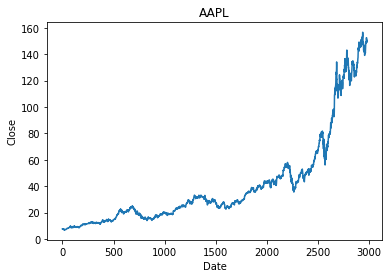

In [ ]:
close = data['Close']
ax = close.plot(title='AAPL')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()


In [ ]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

In [ ]:
data = data.rename(columns={"Date" : "ds", "Close" : "y" })

In [ ]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
3340,2022-10-29,203.376742,193.883186,212.873734
3341,2022-10-30,203.518642,193.507689,213.227595
3342,2022-10-31,203.636424,194.217572,212.729751
3343,2022-11-01,203.825109,193.852809,212.636796
3344,2022-11-02,203.968131,193.854005,213.590529


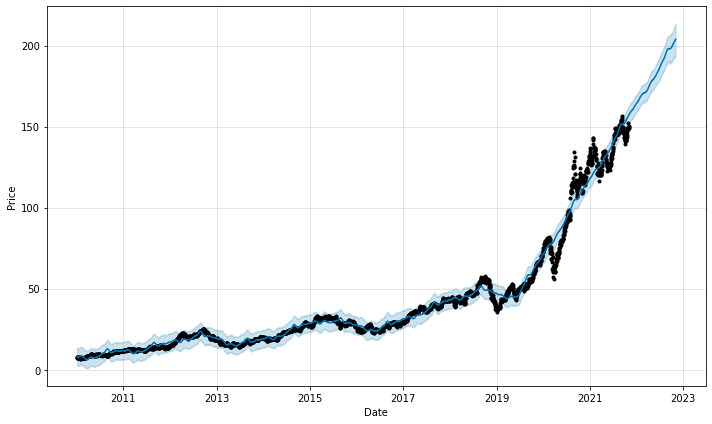

In [ ]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")

# Conclusion 


###By using 3 machine learning methods on Apple stock, our analysis shows that Apple stock is still a valuable investment for the future. However, Value investors need to conduct an external-internal business analysis to develop the full picture of the company's future value before the investment decision.